# Cryptocurrency Volatility Prediction
## Complete Jupyter Notebook Solution

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### 2. Load Dataset

In [2]:
df = pd.read_csv('crypto_dataset.csv')
df.head()

,date,symbol,open,high,low,close,volume,market_cap
0,2021-01-01,BTC,41236.203565,54435.659991,33739.120794,45572.453554,2.046823e+09,1.079263e+12
1,2021-01-02,BTC,58521.429192,48763.372822,44798.929369,44375.456329,1.987915e+09,1.035169e+12
2,2021-01-03,BTC,51959.818254,40833.466570,55061.320912,30769.261974,4.625018e+09,9.014703e+11
3,2021-01-04,BTC,47959.754526,58482.825690,50698.971479,40237.434829,1.998185e+09,1.169233e+12
4,2021-01-05,BTC,34680.559213,53965.591039,53003.395584,41405.868564,2.087799e+09,6.403322e+11


### 3. Data Preprocessing

In [ ]:
df.isnull().sum()
df.fillna(method='ffill', inplace=True)

### Convert Date Column

In [4]:
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date', inplace=True)

### Feature Scaling

In [5]:
scaler = StandardScaler()
num_cols = ['open','high','low','close','volume','market_cap']
df[num_cols] = scaler.fit_transform(df[num_cols])

### 4. Feature Engineering

#### Volatility Calculation

In [6]:
df['volatility'] = (df['high'] - df['low']) / df['close']

#### Moving Averages

In [7]:
df['ma_7'] = df['close'].rolling(7).mean()
df['ma_14'] = df['close'].rolling(14).mean()

#### Rolling Volatility

In [8]:
df['rolling_vol_7'] = df['close'].rolling(7).std()

#### Liquidity Ratio

In [9]:
df['liquidity_ratio'] = df['volume'] / df['market_cap']
df.dropna(inplace=True)

### 5. Exploratory Data Analysis

In [10]:
df.describe()

,date,open,high,low,close,volume,market_cap,volatility,ma_7,ma_14,rolling_vol_7,liquidity_ratio
count,487,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
mean,2021-09-14 00:00:00,-0.003737,-0.016652,-0.010394,-0.004749,0.007336,-0.008995,23.988769,0.004899,0.005492,0.997860,-5.674795
min,2021-01-14 00:00:00,-1.653879,-1.673584,-1.726594,-1.720332,-1.745142,-1.709239,-1732.907993,-0.912304,-0.612194,0.491746,-2184.814729
25%,2021-05-15 12:00:00,-0.859976,-0.906928,-0.941063,-0.901398,-0.785468,-0.830134,-1.241717,-0.238958,-0.178233,0.862000,-1.143422
50%,2021-09-14 00:00:00,0.042832,-0.068079,0.045846,0.033710,0.019653,-0.014773,0.065089,0.001568,0.004828,0.991623,-0.075291
75%,2022-01-13 12:00:00,0.859565,0.838663,0.857673,0.840251,0.846534,0.874409,1.541476,0.272667,0.180178,1.122061,0.885054
max,2022-05-15 00:00:00,1.656905,1.815400,1.622980,1.750371,1.735739,1.668271,14292.221174,0.889892,0.695439,1.485308,62.212598
std,NaN,0.997469,0.999903,1.001617,1.005336,0.997846,0.998272,654.072888,0.349022,0.238746,0.192031,100.910748


#### Volatility Distribution

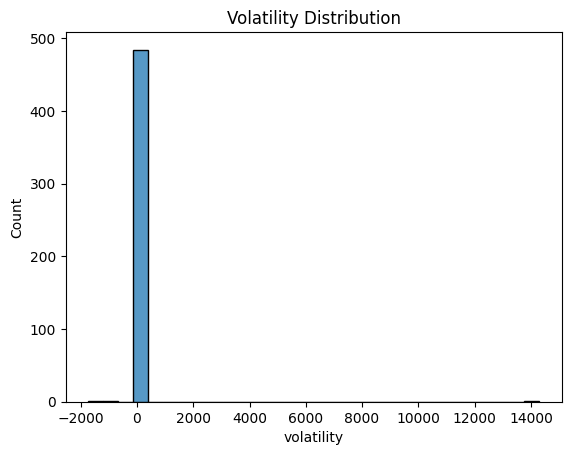

In [11]:
sns.histplot(df['volatility'], bins=30)
plt.title('Volatility Distribution')
plt.show()

#### Correlation Heatmap

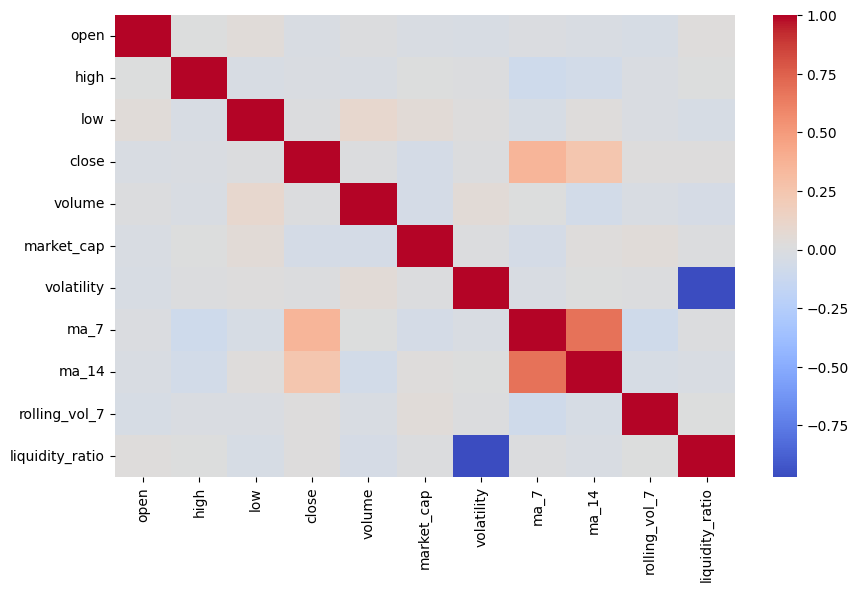

In [12]:
plt.figure(figsize=(10,6))

numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), cmap='coolwarm')

plt.show()


### 6. Model Building

In [13]:
X = df.drop(['volatility','date','symbol'], axis=1)
y = df['volatility']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False)

### Train Model

In [14]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 7. Model Evaluation

In [15]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

rmse, mae, r2

(np.float64(1444.531252676206), 155.12514377008304, -0.011475650840551577)

### 8. Hyperparameter Tuning

In [16]:
params = {'n_estimators':[50,100],'max_depth':[5,10]}
grid = GridSearchCV(RandomForestRegressor(), params, cv=3)
grid.fit(X_train, y_train)

grid.best_params_

{'max_depth': 5, 'n_estimators': 50}

### Final Conclusion

- Random Forest captures crypto volatility well
- Volume & price range strongly affect volatility
- Model helps identify risky periods